In [1]:
from google.colab import files
uploaded=files.upload();

Saving dataset.csv to dataset.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


In [4]:
data = pd.read_csv('dataset.csv')  
data

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [5]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        42 non-null     int64
 1   bloodpressure  42 non-null     int64
 2   diabetes       42 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [6]:
# Data of values(Max, min, std...)
data.describe()

,glucose,bloodpressure,diabetes
count,42.000000,42.00000,42.000000
mean,43.333333,77.97619,0.571429
std,6.214329,9.25911,0.500870
min,30.000000,63.00000,0.000000
25%,40.000000,70.50000,0.000000
50%,40.000000,77.50000,1.000000
75%,45.000000,85.00000,1.000000
max,65.000000,98.00000,1.000000


In [7]:
# Data Correlation: Relationship between columns
data.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.219010,0.117541
bloodpressure,-0.219010,1.000000,-0.848989
diabetes,0.117541,-0.848989,1.000000


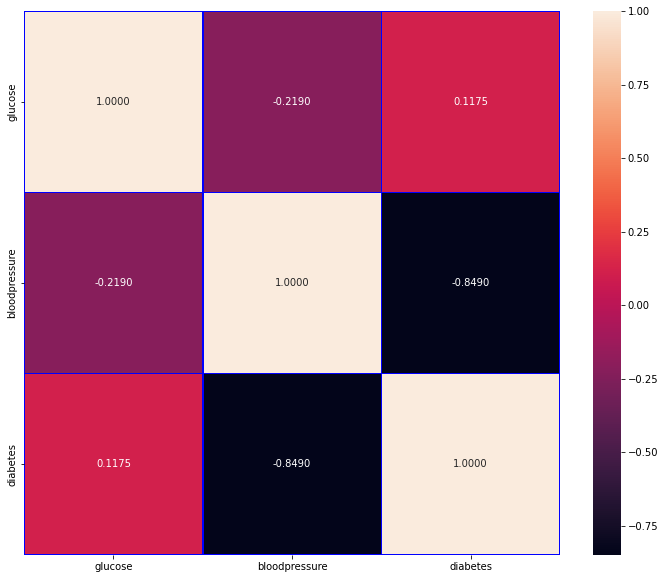

In [8]:
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, linecolor = "blue", fmt = ".4f", ax = ax)
plt.show()

1    24
0    18
Name: diabetes, dtype: int64

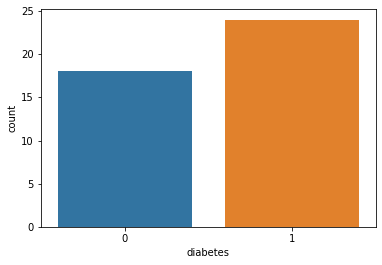

In [10]:
sns.countplot(x = "diabetes", data = data)
data.loc[:,"diabetes"].value_counts()

In [12]:
data_nbc = pd.read_csv("dataset.csv")
data_nbc

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [33]:
X = data.iloc[:,:-1].values
y = data.iloc[:,2].values

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X, y, test_size = 0.2, random_state =0)

In [21]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)

X_test=sc_x.transform(X_test)

In [22]:
#fitting Naïve Bayes Classifier to the training set 
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [23]:
#Predict the test set results
y_pred=classifier.predict(X_test)
y_test,y_pred

(array([1, 0, 0, 1, 1, 1, 0, 0, 1]), array([1, 0, 0, 1, 1, 1, 1, 0, 1]))

In [24]:
#Making Confusion Matrix to check whether the test set gives the correct result
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[3, 1],
       [0, 5]])

In [25]:
# Finding accuracy
from sklearn.metrics import accuracy_score
AR=accuracy_score(y_test,y_pred)
print(AR)

0.8888888888888888


In [26]:
#Make a prediction 
#glucose : 46 blood pressure :75
xP=sc_x.transform([[46,75]])
prediction=classifier.predict(xP)
print(prediction)

[1]


In [29]:
print("Mean absolute Error: " +str(mae(y_test,y_pred)))

Mean absolute Error: 0.1111111111111111


In [30]:
print("Mean squared Error: " +str(mse(y_test,y_pred)))

Mean squared Error: 0.1111111111111111


In [32]:
from math import sqrt
print("Root Mean squared Error: " +str(sqrt(mae(y_test,y_pred))))

Root Mean squared Error: 0.3333333333333333
